In [96]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

def cv_show(name, image):
    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(name, image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}', fontsize=12, labelpad=15)
    plt.show()

### 图像平滑处理

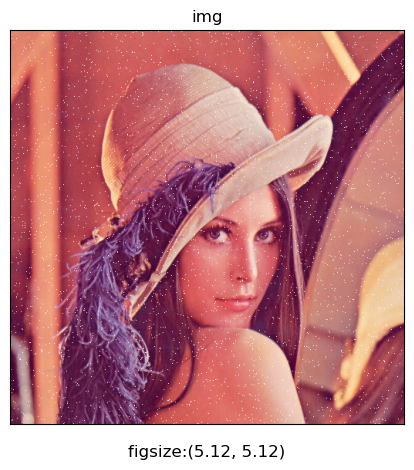

In [97]:
img = cv2.imread('assets/lenaNoise.png')

# cv_show('img', img)

plt_show('img', img)

#### 均值滤波：cv2.blur()

cv2.blur 函数是 OpenCV 库中的一个函数，用于对图像进行均值模糊处理。</br>均值模糊是一种简单且常用的图像平滑技术，它通过用图像中每个像素点周围的像素的平均值替换该像素点的值来减少图像的噪声。

##### dst = cv2.blur(src, ksize)

参数：</br>
- src：表示输入图像，可以是灰度图像或者彩色图像。
- ksize：表示模糊内核的大小。这是一个元组 (width, height)，其中 width 和 height 必须是正奇数。例如，(3, 3) 表示一个 3x3 的内核。

返回值：</br> 
- dst 是模糊处理后的图像

均值模糊的工作原理如下：</br>

1. 对于图像中的每个像素点，函数会考虑一个以该像素为中心的 ksize 大小的区域（通常是正方形）。
2. 计算这个区域内所有像素的平均值。（对于边缘像素，采用边界复制的方式进行边缘填充后进行计算）
3. 将这个平均值赋给该像素点，作为模糊后的结果。

<img src="assets/image.png" alt="image" weight=250, height=300, style="margin: auto;"/>

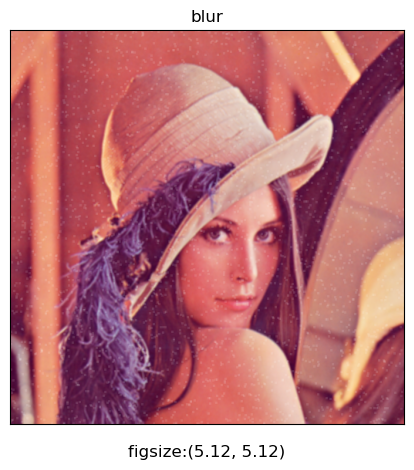

In [98]:
# 均值滤波
# 简单的平均卷积操作
# 简单来说就是，计算核的平均值，用这个值替代核的中间数值
# 对于边缘像素，采用边界复制的方式进行边缘填充后进行计算
blur = cv2.blur(img, (3, 3))
# cv_show('blur', blur)
plt_show('blur', blur)

In [99]:
img[:3, 0:3, 0]

array([[125, 125, 133],
       [125, 125, 133],
       [125, 125, 133]], dtype=uint8)

In [100]:
blur[:3, 0:3, 0]

array([[125, 128, 129],
       [125, 128, 129],
       [125, 128, 129]], dtype=uint8)

#### 方框滤波：cv2.boxFilter()

cv2.boxFilter 函数是 OpenCV 库中的一个函数，用于对图像进行盒式滤波（也称为均值滤波）。</br>盒式滤波是一种线性滤波器，它通过计算图像中每个像素点周围邻域内的像素的平均值来平滑图像。</br>这种滤波方法与 cv2.blur 函数非常相似，但 cv2.boxFilter 提供了更多的灵活性，因为它允许用户指定归一化（normalization）选项。

##### dst = cv2.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]])

参数：</br>
- src：输入图像，可以是灰度图像或者彩色图像。
- ddepth：目标图像所需的深度，如果设置为 -1，则目标图像和源图像具有相同的深度。
- ksize：核大小，表示滤波器的大小，格式为 (width, height)，且宽度和高度必须是正奇数。
- dst：输出图像，可以省略，如果不指定，函数会自动创建一个与 src 相同大小和类型的目标图像。
- anchor：锚点，表示内核中锚点的位置，默认值是 (-1, -1)，表示锚点位于内核中心。
- normalize：归一化标志，如果设置为 True，则进行归一化，使得滤波后的像素值总和不变（总和为1）。如果设置为 False，则不进行归一化，此时内核中的每个元素都是相同的，总和为核大小的面积。
- borderType：边界类型，用于处理边界扩展，默认值是 cv2.BORDER_DEFAULT。

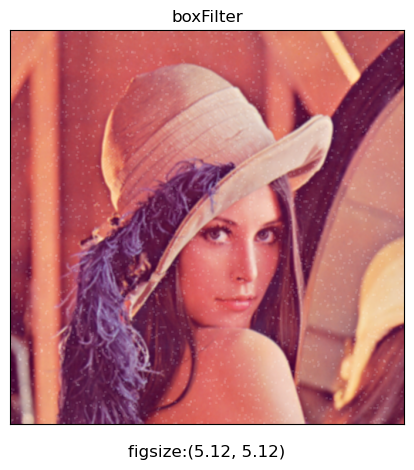

In [101]:
# 方框滤波
# 选择归一化时，基本和均值一样
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  

# cv_show('boxFilter', box)
plt_show('boxFilter', box)

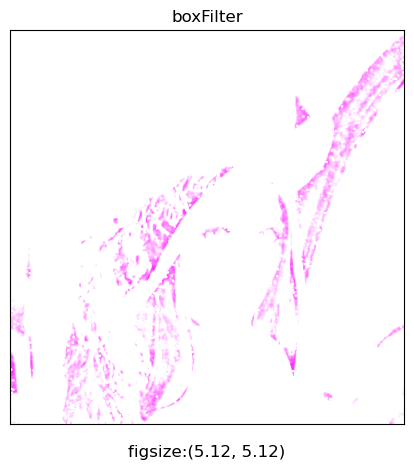

In [102]:
# 方框滤波
# 如果不归一化，则容易越界（像素值大于255）
# 所有越界值都取值255
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  

# cv_show('box', box)
plt_show('boxFilter', box)

#### 高斯滤波：cv2.GaussianBlur()

cv2.GaussianBlur() 函数是 OpenCV 库中的一个函数，用于对图像应用高斯模糊，这是一种使用高斯函数作为卷积核的图像平滑技术。</br>高斯模糊通过将图像与高斯分布（正态分布）的卷积核进行卷积来减少图像的噪声和细节，它比均值模糊（cv2.blur()）能更好地保留边缘信息，因为它考虑了像素之间的距离。

##### dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

参数：</br>
- src：输入图像，可以是灰度图像或者彩色图像。
- ksize：高斯核的大小，这是一个正奇数或零的元组 (width, height)。如果这个值为零，那么它将从 sigmaX 和 sigmaY 计算得出。
- sigmaX：X 方向上的高斯核标准差。如果这个值为零，它将从 ksize 中计算得出；如果 ksize 也为零，则 sigmaX 必须为正数。较大的 sigmaX 值意味着更模糊的图像。
- dst：输出图像，可以省略，如果不指定，函数会自动创建一个与 src 相同大小和类型的目标图像。
- sigmaY：Y 方向上的高斯核标准差。如果这个值为零，它会被设置成和 sigmaX 一样。如果 sigmaY 也为零，那么它将从 sigmaX 计算得出。
- borderType：边界类型，用于处理边界扩展，默认值是 cv2.BORDER_DEFAULT。

高斯模糊是一种非常有效的去噪方法，因为它模拟了人类视觉系统中由光学和神经过程引起的模糊效果。

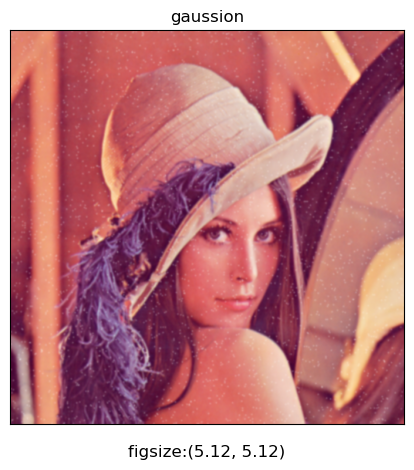

In [103]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
gaussian = cv2.GaussianBlur(img, (5, 5), 1)  

# cv_show('gaussion', gaussian)
plt_show('gaussion', gaussian)

#### 中值滤波：cv2.medianBlur()

cv2.medianBlur() 函数是 OpenCV 库中的一个函数，用于对图像应用中值模糊（Median Blur）。</br>中值模糊是一种非线性图像平滑技术，它通过将图像中每个像素点的值替换为其邻域内的中值来减少图像噪声，特别是椒盐噪声（salt-and-pepper noise）。</br>与均值模糊和高斯模糊不同，中值模糊不会模糊图像的边缘。

##### dst = cv2.medianBlur(src, ksize)

参数：</br>
- src：输入图像，可以是灰度图像或者彩色图像。需要注意的是，如果输入图像是彩色图像，函数会将图像转换为灰度图像再进行中值模糊处理。
- ksize：滤波窗口的大小，必须是正奇数。这个值决定了邻域的大小，即考虑多少个像素点来计算中值。
该函数的返回值 dst 是应用了中值模糊后的图像。

工作原理：</br>
1. 对于图像中的每个像素点，选择一个以该像素为中心的 ksize x ksize 的邻域。
2. 将邻域内所有像素的灰度值进行排序。
3. 取排序后像素值的中间值（中值）作为该像素点的新值。

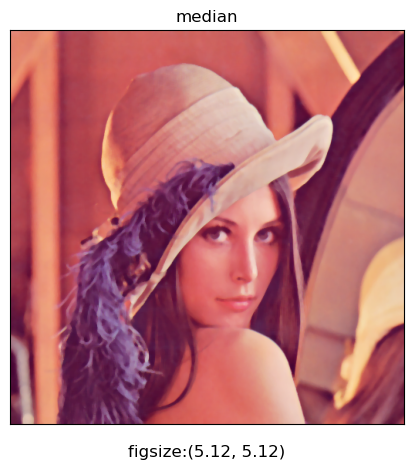

In [104]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波

# cv_show('median', median)
plt_show('median', median)

#### 展示三种滤波操作效果

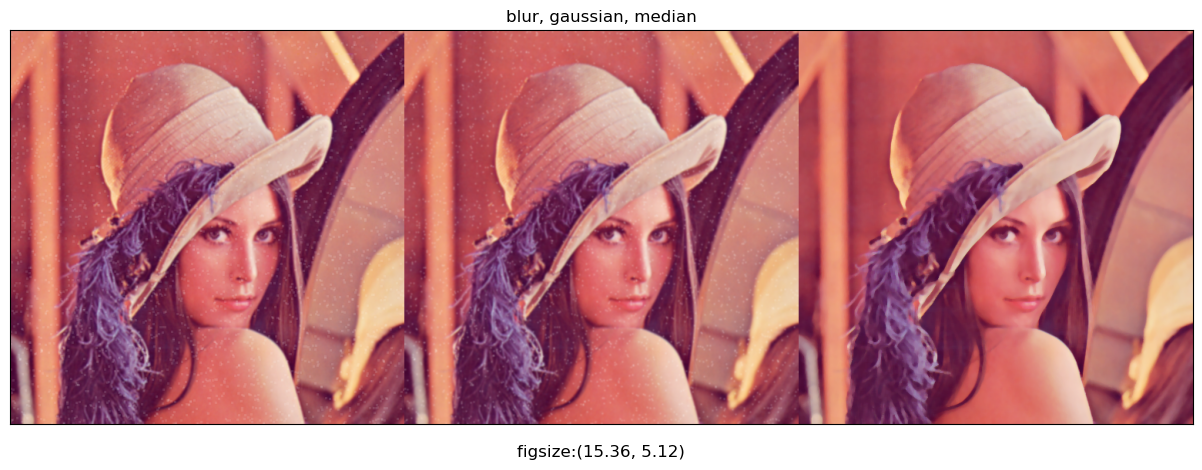

In [105]:
# 展示所有的
res = np.hstack((blur, gaussian, median))
# print (res)

# cv_show('median vs average', res)

plt_show('blur, gaussian, median', res)